# Setting up

## Tasks:

| Id | Description                                    | Duration | Dependencies | Importance | Urgency |
|----|------------------------------------------------|----------|--------------|------------|---------|
| 0  | Doing PCW                                      | 360      | None         | True       | True    |
| 1  | Wearing running shoes                           | 10       | none         | False      | False   |
| 2  | Running around Namsan Park                      | 30       | 1            | True       | False   |
| 3  | Calling Family                                  | 10       | None         | True       | False   |
| 4  | Checking Phone                                  | 30       | None         | False      | False   |
| 5  | Attending CS110 Class                           | 90       | 1            | True       | True    |
| 6  | Changing to Gym clothes                         | 5        | None         | False      | False   |
| 7  | Commuting to the Gym                             | 5        | 4            | False      | False   |
| 8  | Going to the Gym                                 | 60       | 3, 4         | True       | False   |
| 9  | Eating Korean Fried chicken with friends        | 120      | None         | False      | True    |
| 10 | Walking back home while exploring Haebangchon   | 30       | 9            | True       | False   |




# Explanation of the tasks and relevance:

## Regular tasks:

- **Doing PCW:** Completing the Pre-class work for the classes.
- **Calling Family:** Calling family back home is significant to me as it allows me to stay connected to them despite the long distance that separates us.
- **Checking Phone:** This is a task that I try to schedule in my day instead of having to do it impulsively throughout the day.
- **Attending CS110 Class:** An important task as a Minerva student.
- **Going to the Gym:** An important task to maintain my health. This task has ‘changing clothes’ and ‘commuting’ as dependencies. These activities capture my daily routine and the tasks that have to be completed throughout my day wherever I might be.

## Rotation-city-centered tasks:

- **Running around Namsan Park:** Running is part of my morning routine, 'Wear my running shoes' is a dependency of this task. Namsan Park is an iconic place in Seoul, and running around it allows me to experience Seoul’s nature.
- **Eating Korean Fried Chicken with friends:** Korean fried chicken is a delight and one of the comforting foods to eat when visiting Korea.
- **Walking back home while exploring Haebangchon:** This neighborhood is one of the most diverse in Seoul and brings together foreign and Korean cultures. These are Seoul-specific activities that allow me to dive deep into Korean culture and learn more about the diversity of my current rotation city spontaneously.


# Python Implementation Max Heap


In [1]:
class MaxHeap:
    """
    A class that implements properties and methods supporting a max priority queue data structure.

    Attributes
    ----------
    heap : list
        A Python list where task objects are stored
    heap_size: int
        An integer counter of the number of tasks present in the max heap
    """

    def __init__(self):
        """
        Initializes an instance of MaxHeap.
        """
        self.heap = []        # Initialize an empty list to store tasks
        self.heap_size = 0    # Initialize the heap size counter

    def left(self, i):
        """
        Takes the index of the parent node and returns the index of the left child node.

        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        -------
        int
            Index of the left child node
        """
        # Formula for left child
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node and returns the index of the right child node.

        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        -------
        int
            Index of the right child node
        """
        # Formula for right child
        return 2 * i + 2

    def parent(self, i):
        """
        Takes the index of the child node and returns the index of the parent node.

        Parameters
        ----------
        i: int
            Index of child node

        Returns
        -------
        int
            Index of the parent node
        """
        # Formula for the parent
        return (i - 1) // 2

    def max_key(self):
        """
        Returns the task with the highest priority in the priority queue.

        Parameters
        ----------
        None

        Returns
        -------
        Task
            The task object with the highest priority
        """
        return self.heap[0]

    def heappush(self, task):
        """
        Insert a task into the priority queue.

        Parameters
        ----------
        task: Task
            The task object to be inserted

        Returns
        -------
        None
        """
        self.heap.append(task)                    # Add the new task to the end of the list
        self.increase_key(self.heap_size, task)  # Fix the heap to maintain the max-heap property
        self.heap_size += 1                     # Increment the heap size

    def increase_key(self, i, task):
        """
        Modifies the value of a task in a max priority queue with a higher value.

        Parameters
        ----------
        i: int
            The index of the task to be modified
        task: Task
            The new task object

        Returns
        -------
        None
        """
        if task < self.heap[i]:
            raise ValueError('New task has lower priority than the current task')
        self.heap[i] = task
        
        # Fix the max-heap property by swapping with the parent if necessary
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j

    def heapify(self, i):
        """
        Creates a max heap from the index given.

        Parameters
        ----------
        i: int
            The index of the root node of the subtree to be heapified

        Returns
        -------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        
        # Determine the largest element among the root, left, and right children
        if l <= (self.heap_size - 1) and heap[l] > heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size - 1) and heap[r] > heap[largest]:
            largest = r
            
        # If the largest element is not the root, swap with the root and recursively heapify
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        Returns the task with the highest priority in the max priority queue and removes it.

        Parameters
        ----------
        None

        Returns
        -------
        Task
            The task object with the highest priority
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no tasks in the priority queue')
        max_task = self.heap[0]
        self.heap[0] = self.heap[-1]   # Swap the last element with the root
        self.heap.pop()                # Remove the last element
        self.heap_size -= 1            # Decrement the heap size
        
        # Fix the max-heap property starting from the root
        self.heapify(0)
        
        return max_task

# Task Scheduler


In [ ]:
class Task:
    def __init__(self, id, description, duration, dependencies=None, status="N", urgency=False, importance=False, start_time=None):
        """
        Initialize a Task object.

        Parameters
        ----------
        id : int
            Unique identifier for the task.
        description : str
            Description of the task.
        duration : int
            Duration of the task in minutes.
        dependencies : list, optional
            List of task IDs that this task depends on.
        status : str, optional
            Current status of the task (default is "N" for not started).
        urgency : bool, optional
            Indicates the urgency of the task.
        importance : bool, optional
            Indicates the importance of the task.
        start_time : int, optional
            Scheduled start time for the task.
        """
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies or []
        self.status = status
        self.urgency = urgency
        self.importance = importance
        self.start_time = start_time
        self.priority = int

        
    def __lt__(self, other):
        """
        Compare two Task objects based on priority.

        Parameters
        ----------
        other : Task
            Another Task object for comparison.

        Returns
        -------
        bool
            True if this task has lower priority than the other, False otherwise.
        """
        # Checking if the the two comparables is of the same type
        if isinstance(other, Task):
            
            # Prioritizing comparision by the start_time
            if self.start_time is not None and other.start_time is not None:
                return self.start_time > other.start_time
            
            # Comparing usign priority value
            return self.priority < other.priority
        else:
            raise TypeError("Cannot compare Task with object of type {}".format(type(other)))

            
            
class MyScheduler:
    
    
    # Possible status of a task
    NOT_STARTED = 'N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'

    
    def __init__(self, tasks, initial_starting_time: int, final_time: int):
        """
        Initialize a MyScheduler object.

        Parameters
        ----------
        tasks : list of Task
            List of Task objects to be scheduled.
        initial_starting_time : int
            Initial time for scheduling.
        final_time : int
            Final time for scheduling.
        """
        self.tasks = tasks
        self.priority_queue = MaxHeap()
        self.priority_queue_fixed = MaxHeap()
        self.starting_time_queue = MaxHeap()
        self.priority = float()
        self.current_time = initial_starting_time
        self.final_time = final_time
        

    def compute_dependency_weight(self, comparable):
        """
        Compute the weight of task dependencies.

        Parameters
        ----------
        comparable : Task
            The task for which to compute the dependency weight.

        Returns
        -------
        int
            The computed dependency weight.
        """
        weight = 0
        
        # Making sure that even if the comparable's weight is updated in case it is the final task 
        # after the series of its dependencies
        if comparable.dependencies:
            weight += 900 * len(comparable.dependencies)
        for task in self.tasks:
            if task != comparable:
                if comparable.id in task.dependencies:
                    # Prioritizing the dependees of tasks associated with a start_time
                    if task.start_time:
                        weight += 100000
                    weight += 900
        return weight

    
    def compute_priority(self):
        """
        Compute priority for all tasks based on importance, urgency, dependency weight, and duration
        by updating the attribute task.priority.
=
        """
        #temporarily storing the tasks in another list
        updated_priority_tasks = self.tasks
        
        for task in updated_priority_tasks:
            
            #formula for computing priority
            task.priority = int(task.importance) * 100 + int(task.urgency) * 50 + self.compute_dependency_weight(task) - task.duration/100
            
        # Updating back the tasks make sure that the updating process dosen't interfere 
        # witht the other loops within the compute_dependency_weight method
        self.tasks = updated_priority_tasks

        
    def calculate_time_window(self, current_time):
        """
        Calculate the available time window for scheduling based on the presence of a fixed time task
        or in its abscnece the interval between the the current time and the final time.

        Parameters
        ----------
        current_time : int
            The current time in the scheduler.

        Returns
        -------
        int
            The available time window.
        """
        if self.starting_time_queue.heap_size < 1:
            return self.final_time - current_time
        else:
            return self.starting_time_queue.max_key().start_time - current_time

        
    def is_dependent_duration(self, task):
        """
        Calculate the total duration of a task and its dependencies so we don't pick a task to fill the time window 
        when it the task is only meaningful in sequence with its other dependencies

        Parameters
        ----------
        task : Task
            The task for which to calculate the duration including dependencies.

        Returns
        -------
        int
            The total duration of the task and its dependencies.
        """
        tasks_together = []
        duration = 0
        for t in self.tasks:
            if (task.id in t.dependencies) and (t.id not in tasks_together) and (not t.start_time):
                duration += t.duration
        return duration + task.duration

    
    def get_tasks_ready(self):
        """
        Add tasks to the starting_time_queue and priority queues if they are ready for scheduling.
        """
        for task in self.tasks:
            
            # Filtering by the not started status
            if task.status == self.NOT_STARTED:
                
                # Declaring a bool to control for the pushing into the starting_time_queue
                # if the same fixed time task has already been pushed
                insertion = True
                
                # Searching for the task inside the queue to not push it again
                for i in self.starting_time_queue.heap:
                    if i == task:
                        insertion = False
                
                # Pushing the task in case it is not present in the starting_time_queue
                if insertion and task.start_time:
                    self.starting_time_queue.heappush(task)
                
                # Filtering by depndencies
                if not task.dependencies:
                    
                    #Pushing the tasks with a fixed time
                    if task.start_time is not None:
                        self.priority_queue_fixed.heappush(task)
                        task.status = self.IN_PRIORITY_QUEUE
                        
                    #Pushing flexibale tasks
                    else:
                        self.priority_queue.heappush(task)
                        task.status = self.IN_PRIORITY_QUEUE

                        
    def remove_dependency(self, task_id):
        """
        Remove a task from the dependencies of other tasks.

        Parameters
        ----------
        task_id : int
            The ID of the task to be removed from dependencies.
        """
        for t in self.tasks:
            if t.id != task_id and task_id in t.dependencies:
                t.dependencies.remove(task_id)

                
    def format_time(self, time):
        """
        Format time for display.

        Parameters
        ----------
        time : int
            The time to be formatted.

        Returns
        -------
        str
            The formatted time string.
        """
        return f"{(time//60)%24}:{time%60:02d}"

        
    def check_unscheduled_tasks(self):
        """
        Check if there are unscheduled tasks or tasks stuck in the priority queue.

        Returns
        -------
        bool
            True if there are unscheduled tasks, False otherwise.
        """
        return any(task.status == self.NOT_STARTED or task.status == self.IN_PRIORITY_QUEUE for task in self.tasks)

    
    def run(self, initial_starting_time: int, printable = True):
        """
        Run the scheduling algorithm.

        Parameters
        ----------
        initial_starting_time : int
            Initial time for scheduling.
        printable : bool, optional
            Whether to print outputs (default is True).

        Returns
        -------
        list
            List of scheduled task IDs.
        """
        if printable:
            print("Tasks added to the simple scheduler:")
            print("--------------------------------------")
        
        current_time = self.current_time
        self.compute_priority()
        total_time = 0
        schedule = []

        while self.check_unscheduled_tasks() and current_time < self.final_time:
            
            # Getting tasks ready in their respective queues
            self.get_tasks_ready()
            
            #calculating the time window based on the updated current_time
            time_window = self.calculate_time_window(current_time)
            
            # Initializing a bool to break from the while loop if a task has been scheduled
            # This allows for updated and accurate 
            flexible_scheduler = False
            
            while self.priority_queue and self.priority_queue.heap_size > 0 and not flexible_scheduler:
                
                # Extracting the root element from priority_queue
                task = self.priority_queue.heappop()
                
                if task.duration <= time_window and self.is_dependent_duration(task) <= time_window:
                    
                    if printable:
                        # Printing the task
                        print(f"🕰t={self.format_time(current_time)}")
                        print(f"\tstarted '{task.description}' for {task.duration} mins... with {task.priority} priority")
                        print(f"\t✅ t={self.format_time(current_time+task.duration)}, task completed!")
                    
                    # Updating the time variables
                    current_time += task.duration
                    time_window = self.calculate_time_window(current_time)
                    total_time += task.duration
                    
                    self.remove_dependency(task.id)
                    task.status = self.COMPLETED
                    schedule.append(task.id)
                    
                    flexible_scheduler = True
                    
                else:
                    task.status = self.NOT_STARTED
                


            if self.priority_queue_fixed and self.priority_queue_fixed.heap_size > 0 and self.priority_queue_fixed.max_key().start_time >= current_time:
                
                # Extracting the root element from priority_queue_fixed
                task = self.priority_queue_fixed.heappop()
                
                # Extracting the root element from starting_time_queue also to make sure that both queues match
                task_keeping_track = self.starting_time_queue.heappop()
                
                if printable:
                    # Printing the task
                    print(f"🕰t={self.format_time(current_time)}")
                    print(f"\tstarted '{task.description}' for {task.duration} mins... with {task.priority} priority")
                    print(f"\t✅ t={self.format_time(current_time+task.duration)}, task completed!")
                
                # Updating the time variables
                current_time += task.duration
                total_time += task.duration
                
                task.status = self.COMPLETED
                self.remove_dependency(task.id)
                schedule.append(task.id)
                
        if printable:    
            print(f"\n🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min!")
            print("Final Schedule: ",schedule)

# Example Tasks and Running the Scheduler

In [2]:
# Example tasks
task_0 = Task(id=0, description='Wake Up ', duration=0, dependencies=None, urgency=True, importance=True, start_time=480)
task_1 = Task(id=1, description='Wearing running shoes', duration=10, dependencies=None, urgency=False, importance=True)
task_2 = Task(id=2, description='Running around Namsan Park', duration=30, dependencies=[1], urgency=False, importance=True)
task_3 = Task(id=3, description='Calling Family', duration=10, dependencies=None, urgency=True, importance=False)
task_4 = Task(id=4, description='Checking Phone', duration=30, dependencies=None, urgency=False, importance=False)
task_5 = Task(id=5, description='Attending CS110 Class', duration=90, dependencies=[11], urgency=True, importance=True, start_time=760)  # Fixed start time for CS110 Class
task_6 = Task(id=6, description='Changing to Gym clothes', duration=5, dependencies=None, urgency=False, importance=True)
task_7 = Task(id=7, description='Commuting to the Gym', duration=5, dependencies=[6], urgency=False, importance=True)
task_8 = Task(id=8, description='Working out in the Gym', duration=60, dependencies=[6, 7], urgency=False, importance=True)
task_9 = Task(id=9, description='Eating Korean Fried chicken with friends', duration=120, dependencies=None, urgency=False, importance=True)
task_10 = Task(id=10, description='Walking back home while exploring Haebangchon', duration=30, dependencies=[9], urgency=False, importance=True)
task_11 = Task(id=11, description='Doing PCW', duration=260, dependencies=None, urgency=True, importance=True)

my_tasks = [task_0, task_1, task_2, task_3, task_4, task_5, task_6, task_7, task_8, task_9, task_10, task_11]

# Example scheduler
simple_scheduler = MyScheduler(my_tasks, initial_starting_time=480, final_time=24*60)
simple_scheduler.run(my_tasks)


Tasks added to the simple scheduler:
--------------------------------------
🕰t=8:00
	started 'Wake Up ' for 0 mins... with 150.0 priority
	✅ t=8:00, task completed!
🕰t=8:00
	started 'Doing PCW' for 260 mins... with 101047.4 priority
	✅ t=12:20, task completed!
🕰t=12:20
	started 'Calling Family' for 10 mins... with 49.9 priority
	✅ t=12:30, task completed!
🕰t=12:30
	started 'Attending CS110 Class' for 90 mins... with 1049.1 priority
	✅ t=14:00, task completed!
🕰t=14:00
	started 'Changing to Gym clothes' for 5 mins... with 1899.95 priority
	✅ t=14:05, task completed!
🕰t=14:05
	started 'Commuting to the Gym' for 5 mins... with 1899.95 priority
	✅ t=14:10, task completed!
🕰t=14:10
	started 'Working out in the Gym' for 60 mins... with 1899.4 priority
	✅ t=15:10, task completed!
🕰t=15:10
	started 'Wearing running shoes' for 10 mins... with 999.9 priority
	✅ t=15:20, task completed!
🕰t=15:20
	started 'Running around Namsan Park' for 30 mins... with 999.7 priority
	✅ t=15:50, task completed!
🕰

# Verification of the output through assert statement

In [3]:
import random
from copy import deepcopy
# Example tasks
task_0 = Task(id=0, description='Wake Up ', duration=0, dependencies=None, urgency=True, importance=True, start_time=480)
task_1 = Task(id=1, description='Wearing running shoes', duration=10, dependencies=None, urgency=False, importance=True)
task_2 = Task(id=2, description='Running around Namsan Park', duration=30, dependencies=[1], urgency=False, importance=True)
task_3 = Task(id=3, description='Calling Family', duration=10, dependencies=None, urgency=True, importance=False)
task_4 = Task(id=4, description='Checking Phone', duration=30, dependencies=None, urgency=False, importance=False)
task_5 = Task(id=5, description='Attending CS110 Class', duration=90, dependencies=[11], urgency=True, importance=True, start_time=760)  # Fixed start time for CS110 Class
task_6 = Task(id=6, description='Changing to Gym clothes', duration=5, dependencies=None, urgency=False, importance=True)
task_7 = Task(id=7, description='Commuting to the Gym', duration=5, dependencies=[6], urgency=False, importance=True)
task_8 = Task(id=8, description='Working out in the Gym', duration=60, dependencies=[6, 7], urgency=False, importance=True)
task_9 = Task(id=9, description='Eating Korean Fried chicken with friends', duration=120, dependencies=None, urgency=True, importance=True)
task_10 = Task(id=10, description='Walking back home while exploring Haebangchon', duration=30, dependencies=[9], urgency=True, importance=True)
task_11 = Task(id=11, description='Doing PCW', duration=260, dependencies=None, urgency=True, importance=True)

my_tasks = [task_0, task_1, task_2, task_3, task_4, task_5, task_6, task_7, task_8, task_9, task_10, task_11]


tasks_shuffled = deepcopy(my_tasks)  # Make a copy to avoid modifying the original list
random.shuffle(tasks_shuffled)

simple_scheduler_shuffled = MyScheduler(tasks_shuffled, initial_starting_time=480, final_time=24*60)
simple_scheduler_shuffled.run(tasks_shuffled)



# Comparing the two schedulers for equality
# assert simple_scheduler.run(my_tasks) == simple_scheduler_shuffled.run(tasks_shuffled)

Tasks added to the simple scheduler:
--------------------------------------
🕰t=8:00
	started 'Wake Up ' for 0 mins... with 150.0 priority
	✅ t=8:00, task completed!
🕰t=8:00
	started 'Doing PCW' for 260 mins... with 101047.4 priority
	✅ t=12:20, task completed!
🕰t=12:20
	started 'Calling Family' for 10 mins... with 49.9 priority
	✅ t=12:30, task completed!
🕰t=12:30
	started 'Attending CS110 Class' for 90 mins... with 1049.1 priority
	✅ t=14:00, task completed!
🕰t=14:00
	started 'Changing to Gym clothes' for 5 mins... with 1899.95 priority
	✅ t=14:05, task completed!
🕰t=14:05
	started 'Commuting to the Gym' for 5 mins... with 1899.95 priority
	✅ t=14:10, task completed!
🕰t=14:10
	started 'Working out in the Gym' for 60 mins... with 1899.4 priority
	✅ t=15:10, task completed!
🕰t=15:10
	started 'Eating Korean Fried chicken with friends' for 120 mins... with 1048.8 priority
	✅ t=17:10, task completed!
🕰t=17:10
	started 'Walking back home while exploring Haebangchon' for 30 mins... with 1049

# Algorithmic Strategy: Priority Queue Justification

To solve the problem of scheduling daily tasks, a well-suited data structure, such as a priority queue, is essential. The following characteristics justify this choice, especially when comparing it to other data structures like an array.

1. **Dynamic Priority Adjustment:**
   - Daily tasks often come with varying levels of importance and urgency. Unlike sorting, a priority queue allows for dynamic adjustments in priority, efficiently handling additions or removals without rearranging the entire structure.

2. **Efficient Insertion and Removal:**
   - Daily tasks may need to be added or removed quickly. Priority queues, especially binary heaps, provide efficient insertion and removal operations in logarithmic time O(logn), ensuring a responsive scheduling algorithm.

3. **Multicentral Prioritization:**
   - Priority queues accommodate diverse criteria for prioritization, such as urgency, importance, duration, and dependencies. They simultaneously prioritize tasks based on multiple criteria, providing flexibility in task management.

4. **Constant-Time Access:**
   - Priority queues excel at providing constant-time access to the highest-priority task, crucial for efficiently identifying and executing the most urgent or important task at any given moment.

5. **Limitations of Sorting:**
   - Sorting a list of tasks has limitations, such as static prioritization based on a single criterion. It may not easily accommodate multicentral properties and various dependencies without significant restructuring. Updating the list when a new task is added or the priority changes is also inefficient.

6. **Three Priority Queues Implementation:**
   - In designing the task scheduler, a system with three priority queues was implemented to efficiently manage diverse criteria.
     - The first queue, `self.priority_queue`, is designated for flexible tasks lacking a specific starting time.
     - The second, `self.fixed_priority_queue`, is dedicated to tasks with fixed times.
     - The third, `self.starting_priority_queue`, accommodates tasks with starting times, even if they have dependencies.

7. **Rationale for the Third Priority Queue:**
   - The third priority queue facilitates the insertion and scheduling of tasks without a fixed time, considering both their duration and that of their subsequent tasks. This approach ensures accurate heap adjustments once a fixed task is completed or dependencies are resolved.

8. **Multiple Priority Queues Benefits:**
   - Utilizing multiple priority queues reduces the complexity of priority calculations and enhances the accuracy of reflected values. It allows for a more nuanced approach to task prioritization.

9. **Incorporating 'Urgency' as a Characteristic:**
   - The introduction of the 'urgency' characteristic diverges from tying urgency solely to fixed time activities. It emphasizes the perception of urgency, aligning with the principles of the Eisenhower matrix.

10. **Weighting Urgency and Importance:**
   - To assist neurodivergent individuals who may struggle with prioritization, the prioritization formula assigns importance a weight of 100 and urgency a weight of 50. This reflects the wisdom embedded in Eisenhower's 1954 speech.

11. **Eisenhower Matrix Principles:**
   - Drawing inspiration from the Eisenhower matrix, which considers both importance and urgency, the prioritization formula advises prioritizing important tasks followed by important but not urgent tasks. Non-important and urgent tasks should be minimized, while non-urgent and non-important tasks should be avoided whenever possible.


# High-level Explanation

The scheduling algorithm operates on a diverse set of tasks, each defined by a range of attributes such as importance, urgency, duration, dependencies, and optional start times. Employing a sophisticated approach, the algorithm utilizes three distinct priority queues to categorize tasks into flexible timing, fixed timing, and those with predefined start times.

Task Prioritization
-------------------
Task prioritization is intricately calculated, taking into account factors like importance, urgency, dependencies, and duration, resulting in a comprehensive priority value. This value becomes the guiding principle for the sequencing of tasks within the schedule. The scheduling loop systematically iterates through available time windows, strategically selecting the highest-priority task that fits seamlessly into the given window.

Dependency Management
----------------------
To ensure a seamless execution, tasks with dependencies are managed diligently, guaranteeing the completion of prerequisites before scheduling dependent tasks. The algorithm also incorporates dynamic adjustments as tasks conclude, adapting the available time window to reflect the evolving schedule state.

Flexible and Fixed-Time Tasks
-------------------------------
The scheduler accommodates both flexible and fixed-time tasks, adeptly prioritizing and scheduling them in alignment with their individual characteristics. The incorporation of effective dependency management is pivotal, ensuring tasks are sequenced correctly, addressing prerequisites before progressing to dependent tasks.

Integration of Urgency and Importance
---------------------------------------
Inspired by the principles of the Eisenhower matrix, as mentioned above, the algorithm seamlessly integrates urgency and importance, avoiding a blind adherence to urgency while emphasizing the significance of each task. As a result, task scheduling feedback, encompassing start and completion times, is consistently provided as tasks are scheduled.

Continuous Scheduling Process
------------------------------
The algorithm tirelessly continues its scheduling process until all tasks are successfully completed or the available time is exhausted. The overarching goal is to optimize task organization based on attributes, dependencies, and user priorities. This ensures that important and urgent tasks are promptly addressed, maintaining an overall flow that contributes to effective time management. The ultimate outcome is an efficiently organized schedule that facilitates the seamless orchestration of daily tasks.


# The following flow chart illustrates the algorithm structure: 

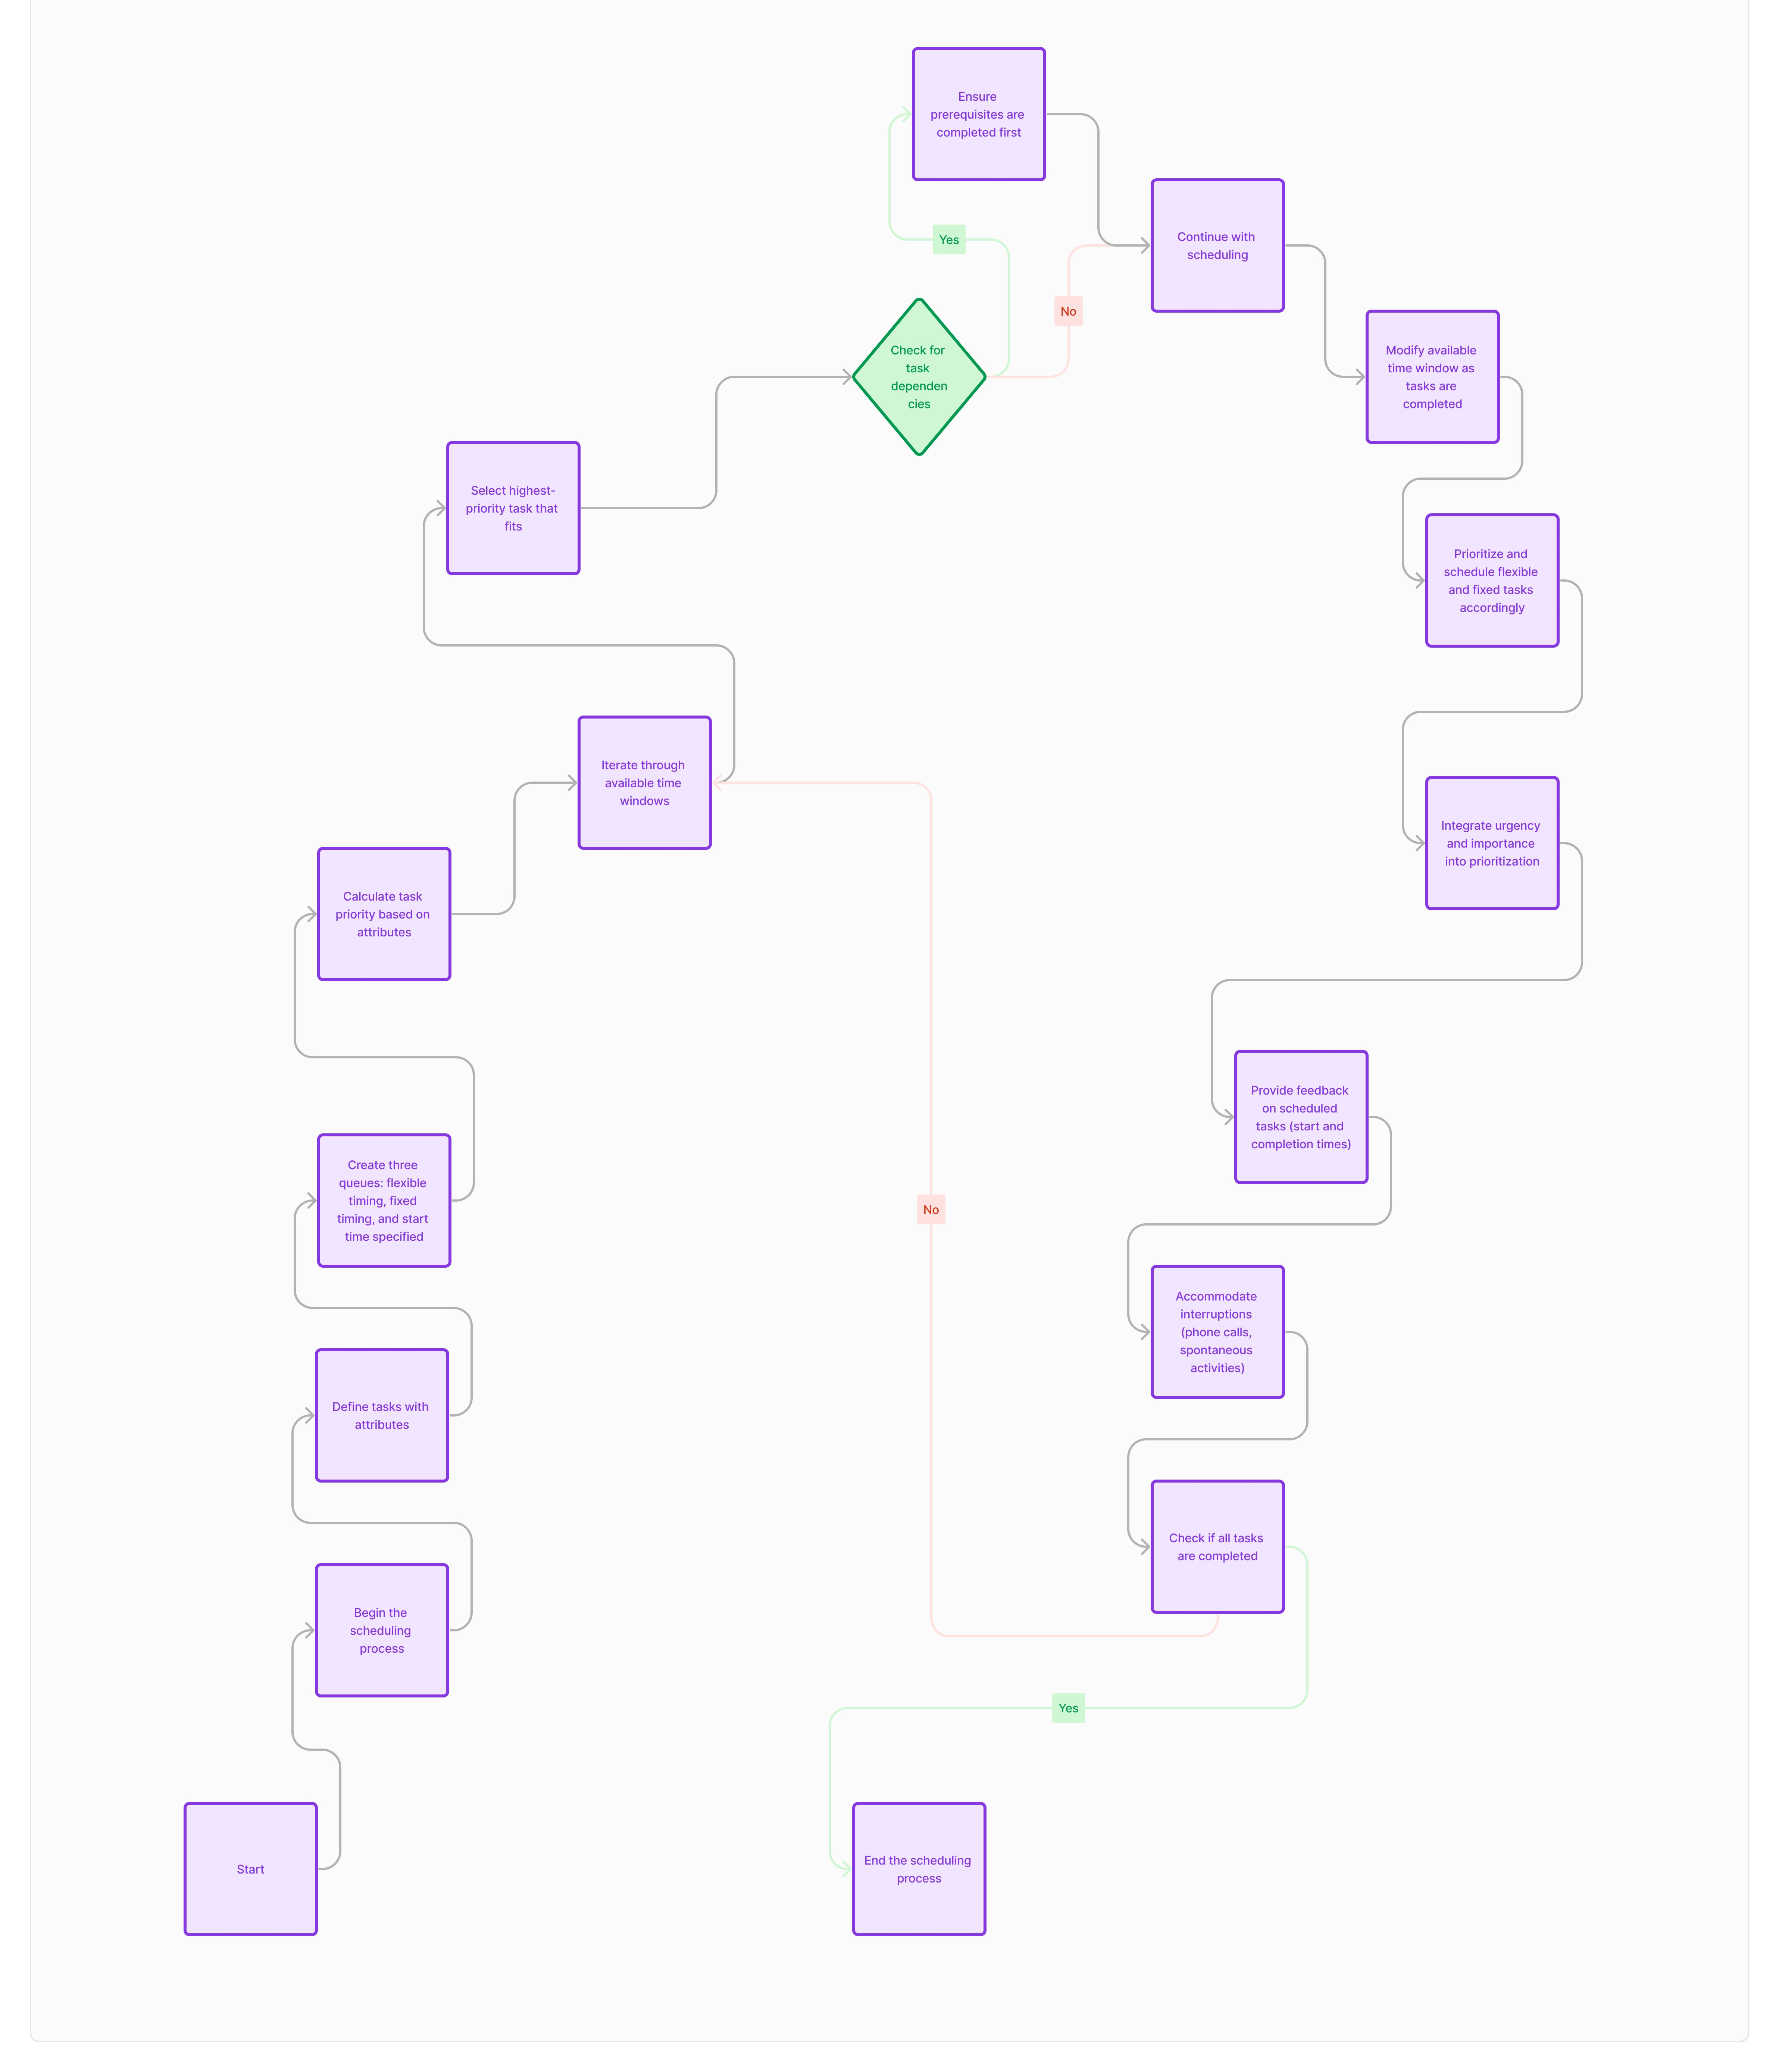

# Priority Value Explanation

The priority function's incorporation of importance and urgency factors is specifically tailored to address the challenges faced by neurodivergent individuals in task prioritization. This section outlines how the algorithm's emphasis on these factors caters to the unique needs of neurodivergent users.

## Cognitive Support for Prioritization:

For neurodivergent individuals who may experience challenges in prioritization, the implementation of urgency and importance attributes aligns with the principles of the Eisenhower Matrix. This matrix provides a structured framework that aids in organizing tasks based on their urgency and importance.

## Structured Decision-Making:

The Eisenhower Matrix, through the urgency and importance attributes, encourages neurodivergent individuals to engage in a more structured decision-making process. By explicitly assigning values to urgency, tasks become less prone to being subconsciously perceived as uniformly urgent, fostering a more accurate assessment.

## Positive Impact on Executive Functioning:

The algorithm's emphasis on reflecting and assigning attributes contributes to the development and enhancement of executive functioning skills. For neurodivergent individuals with impairments in prioritization, this structured approach can serve as a supportive tool for strengthening executive functions related to planning and organizing.

## Encouraging Mindful Decision-Making:

The deliberate consideration of urgency attributes fosters mindful decision-making. Neurodivergent individuals may find value in this aspect as it provides a moment of pause and reflection before determining the urgency of a task, allowing for more deliberate and accurate judgments.

## Increased Self-Awareness:

The process of inputting the urgency attribute prompts individuals to take a moment and reflect on the true urgency of a task. For neurodivergent individuals who may struggle with impulsivity or a tendency to perceive everything as urgent, this intentional reflection helps enhance self-awareness.

## Reduced Overwhelm:

Neurodivergent individuals, particularly those prone to feeling overwhelmed, can benefit from the algorithm's ability to differentiate between urgent and important tasks. This differentiation enables a more nuanced understanding of task priorities, reducing the risk of feeling overwhelmed by a constant sense of urgency.

Now, that urgency and importance are justified, the value of 100 if True for importance versus 50 for urgency further reflects that the user should spend more time in quadrant 1 and 2 of the Eisenhower matrix.


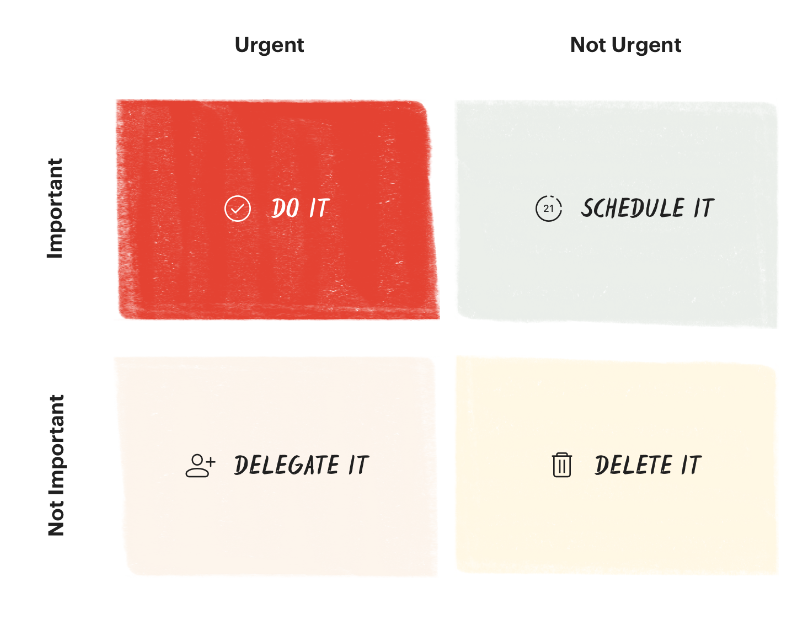

# Priority Value in Task Scheduling

The priority value for each task serves as a filtering mechanism during the scheduling process. However, considering several other factors such as the fixed time of some tasks and the dependencies they might have, capturing all of that within the priority calculation could lead to errors in reflecting the true priority of tasks.

The priority function computes an initial priority, but multiple other filtering processes are implemented to follow logic rules. These additional processes allow for the flexibility to get short-duration tasks done within gaps of waiting time and ensure that tasks with fixed times or dependencies are appropriately accommodated in the overall schedule.


# Analysis

## Benefits of the Algorithmic Strategy:

### Priority-Based Scheduling:
The algorithm employs a priority-based scheduling approach, considering task urgency, importance, and dependencies. This results in a more intelligent and flexible scheduling mechanism.

### Dependency Handling:
The algorithm takes into account task dependencies, ensuring tasks are scheduled in a manner that respects these dependencies. It updates task priorities based on dependencies and dependency weight through the `is_dependnet_calculation` and the dependency weight. This adaptability allows the scheduler to prioritize tasks that require dependencies to be resolved first. Additionally, it ensures that tasks are grouped together if they have a dependency relationship, as determined by the dependency weight calculation.


It also accounts for not prioritizing a task if there is a gap of time between the current time and another fixed time by not allowing tasks to be pushed through the heap if their relations are specifically through the `is_dependent_duration` method.


This is crucial for tasks that act as a starting dependency for a series of actions to be completed. An illustration of this point is going to the GYM. It wouldn’t make sense to commute to the GYM and then attend CS110. This method ensures that flexible tasks that are a starting point to a series of other dependencies can all be scheduled within the time window.


### Fixed and Flexible Task Handling:
The scheduler distinguishes between fixed-time tasks and flexible tasks, ensuring that tasks with specific start times are appropriately scheduled.


### Task Completion Tracking:
The algorithm keeps track of completed tasks, providing visibility into the progress of the schedule.


### Clear Time Window Calculation:
The calculation of the available time window for scheduling is well-defined, considering both fixed-time tasks and the overall scheduling interval.


# Failure and Limitations:

## Limited Handling of Overlapping Dependencies:
The algorithm might face challenges when dealing with overlapping dependencies, where tasks depend on each other and have varying start times. It could lead to suboptimal schedules or difficulties in meeting all dependencies.

## Sensitivity to Initial Priority Calculation:
The effectiveness of the scheduler is highly dependent on the initial priority calculation. If the initial priorities are not well-balanced, it might impact the overall scheduling quality.

## Dependency Time Allocation:
The scheduler assumes that the person scheduling allocates sufficient time for the dependencies of an action, particularly when the action has a fixed time. This is crucial to ensure that dependencies are completed before their dependent tasks.

## Ordered Input of Dependencies:
It is assumed that the user inputs task dependencies in an ordered manner, with the final task including all other dependencies. This ordering enhances the likelihood of tasks having similar priority levels, facilitating their scheduling together.

## Absence of Start Times for Dependencies:
The scheduler assumes that dependencies do not have start times. This simplifies the scheduling process, focusing on the interdependence of tasks without considering specific start times for the tasks upon which others rely.

## Task Duration Within a Day:
The scheduler assumes that the duration of each task is within the scope of a day. Tasks with durations extending beyond a day are not considered in the current implementation.

## Uniform Urgency and Importance for Dependencies:
The scheduler assumes that all dependencies associated with a task share the same urgency and importance values as the final task to be achieved after the completion of all dependencies. This assumption simplifies the prioritization process.


# Time Complexity Analysis

## Priority Calculation (`compute_priority` method):
Calculating the priority for each task involves iterating through all tasks once, resulting in a time complexity of O(n), where n is the number of tasks. This is because each task is considered once in the loop.

## Task Dependency Weight Calculation (`compute_dependency_weight` method):
The `compute_dependency_weight` method has a time complexity of O(n), where n is the number of tasks. It iterates through tasks and dependencies, and the maximum number of dependencies a task can have is proportional to the total number of tasks.

## Tasks Ready Queue (`get_tasks_ready` method):
The `get_tasks_ready` method iterates through tasks, checks their status, and pushes them into different queues. The time complexity is O(n * m), where n is the number of tasks, and m is the `starting_time_queue.heap_size`. In the worst case, this complexity can approach O(n^2), but such scenarios are rare. This would require all tasks to have fixed start times, essentially turning the scheduler into a static calendar. In practice, the occurrence of such a scenario is infrequent and raises questions about the necessity of a dynamic scheduler in situations where tasks are pre-determined with fixed times.

## Dependency Removal (`remove_dependency` method): 
The `remove_dependency` method has a time complexity of O(n), where n is the number of tasks. It iterates through tasks and removes dependencies, and the maximum number of dependencies a task can have is proportional to the total number of tasks.

## Outer Loop (`while self.check_unscheduled_tasks() and current_time < self.final_time`):
The outer loop has a time complexity of O(n), where n is the number of tasks, due to the `check_unscheduled_tasks` method that iterates through tasks and checks their status.

## Nested Loop (`while self.priority_queue and self.priority_queue.heap_size > 0 and not flexible_scheduler`):
The nested loop has a time complexity of O(log n) due to the condition `self.priority_queue.heap_size > 0` and the heap operations.

## Conditional Check (`if self.priority_queue_fixed and self.priority_queue_fixed.heap_size > 0 and self.priority_queue_fixed.max_key().start_time >= current_time`):
This condition has a time complexity of O(log n) due to the heap operations on `priority_queue_fixed`.

## Putting it all together:

Combining these complexities, the overall time complexity is `O(n^3)`, as it is the dominant factor. This theoretical analysis is substantiated by computational complexity experiments.


In practice, such situations are rare, and the algorithm's performance is likely to be more favorable. However, it's important to be aware of the algorithm's limitations and consider its behavior in various scenarios. The algorithm may perform well in dynamic scheduling situations where tasks have flexible start times, but its performance could be less optimal in scenarios with a large number of fixed start times.

As mentioned above, the time complexity approach \(O(n^2)\) is the worst case. This can be further demonstrated through the following experiment:


In [ ]:
import random
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def generate_random_tasks(num_tasks):
    tasks = []
    for i in range(num_tasks):
        max_dependencies = min(i, 3)
        dependencies =  random.sample(range(i), random.randint(0, min(5, i)))
        
        task = Task(
            id=i,
            description=f'Task {i}',
            duration=random.randint(30, 120),
            dependencies=dependencies,
            status="N",
            urgency=bool(random.getrandbits(1)),
            importance=bool(random.getrandbits(1)),
            start_time=None
        )
        tasks.append(task)
    return tasks

# Function to run the scheduling algorithm with experimental analysis
def run_experiment(num_tasks):
    tasks = generate_random_tasks(num_tasks)
    initial_starting_time = 0
    final_time = 1440  # 24 hours in minutes

    scheduler = MyScheduler(tasks, initial_starting_time, final_time)

    start_time = time.time()
    schedule = scheduler.run(initial_starting_time, printable=False)
    end_time = time.time()

    execution_time = end_time - start_time

    

    return execution_time

# Function to run multiple experiments and calculate running average time
def run_multiple_experiments(num_tasks_list, num_experiments):
    average_execution_times = []

    for num_tasks in num_tasks_list:
        execution_times = []
        for _ in range(num_experiments):
            execution_time = run_experiment(num_tasks)
            execution_times.append(execution_time)

        average_execution_time = sum(execution_times) / num_experiments
        
        average_execution_times.append(average_execution_time)

    return average_execution_times

def perform_linear_regression(x, y):
    fit = np.polyfit(x, y, 2)
    return fit

# Define the list of num_tasks to experiment with
num_tasks_list = list(range(1, 16))  # above 16 and it breaks

# Run experiments and collect average execution times
num_experiments = 500
average_execution_times = run_multiple_experiments(num_tasks_list, num_experiments)

# Perform linear regression
fit = perform_linear_regression(num_tasks_list, average_execution_times)

# Plotting the results
plt.plot(num_tasks_list, average_execution_times, marker='o')
plt.plot(num_tasks_list, np.polyval(fit, num_tasks_list), '--', color='red', label='Best Fit Line')
plt.xlabel('Number of Tasks')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Average Execution Time for Different Number of Tasks')
plt.grid(True)
plt.show()



We can see how in the worst-case scenario the scaling behavior is quadratic. Although as mentioned earlier this is rare. The provided algorithm excels in the context of a daily scheduler, specifically designed to handle a workload of approximately 16 tasks. This tailored design aligns with the inherent constraints and objectives of daily scheduling, where the emphasis is on managing a manageable number of tasks efficiently and dynamically. Given the limited number of tasks that are usually inputted in the scheduler, the algorithm's approach prioritizes responsiveness and adaptability, crucial traits for a daily scheduler dealing with a modest number of tasks. For scenarios exceeding the designed capacity, a more scalable solution may be required to maintain optimal performance. The current algorithm's nature ensures that it remains well-suited for the intended scope. 


# LOs and HCs

## Professionalism
In my code, I adhere to established guidelines, presenting a professional and well-documented solution. The code includes clear and meaningful docstrings for classes and methods, contributing to better code understanding. Proper error handling, such as raising `ValueError`s when appropriate, enhances the robustness of the code. Consistency in coding style, following PEP8 conventions, further adds to the professionalism of the presentation.

## cs110_AlgoStratDataStruct
The implementation of the `MaxHeap` class reflects a solid understanding of algorithmic techniques, particularly those related to heaps and priority queues. This class effectively encapsulates data structure principles, demonstrating proficiency in their abstractions, implementations, and functional operations.

## cs110_CodeReadability
The code exhibits clarity and readability through its well-structured organization and the use of meaningful variable and method names. Additionally, comments are strategically placed to explain the purpose and functionality of methods and code sections. Consistent adherence to naming conventions further contributes to code readability.

## cs110_ComplexityAnalysis
The code includes comments and explanations regarding the asymptotic behavior of specific methods, showcasing a comprehension of Big-O notation and complexity analysis. This contributes to a clear understanding of how the algorithm's runtime scales with input size.

## cs110_ComputationalCritique
While not explicitly detailed in the provided code, the implementation of a priority queue can be considered a valuable data structure for specific applications. Further computational critique, including comparative analysis with other data structures or algorithms, could enhance the overall evaluation of the solution.

## cs110_PythonProgramming
The code effectively implements algorithms, analyzes their performance, and applies data structures using Python. While the implementation demonstrates practical Python programming skills, the addition of code for plotting and visualizing performance metrics could further enhance the comprehensiveness of the analysis.

# AI Policy
I have used AI to help me figure out the validity of my algorithmic strategy that aims to accommodate neurodivergent people. I simulated some scenarios where typical daily schedulers might not work with people with prioritization impairment. Reviewing those scenarios helped me confirm that I should tackle the assignment with that strategy. I have used it to format in Markdown to transfer content from the doc to the ipynb file to adhere with the CS110 guide.

# References
- Avoid the “Urgency Trap” with the Eisenhower Matrix. (n.d.). Todoist. [https://todoist.com/productivity-methods/eisenhower-matrix](https://todoist.com/productivity-methods/eisenhower-matrix)
